In [1]:


from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


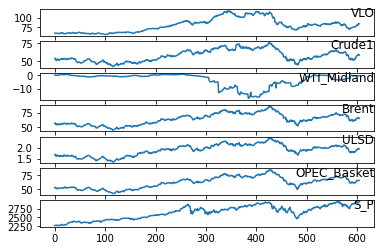

In [2]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('../data/cleandata/DataMulti.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# to plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [13]:

#  series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
# input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = read_csv('../data/cleandata/DataMulti.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())



# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = read_csv('../data/cleandata/DataMulti.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.071272   0.331464   0.964773   0.291054   0.344710   0.307162   
2   0.056448   0.338253   0.961932   0.296118   0.337884   0.315554   
3   0.052233   0.278335   0.955682   0.244032   0.223549   0.254383   
4   0.054559   0.244687   0.958523   0.212684   0.184300   0.229952   
5   0.062552   0.286895   0.958523   0.247890   0.262799   0.268184   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.251506   0.003890  0.056448  
2   0.263069   0.014263  0.052233  
3   0.247410   0.004898  0.054559  
4   0.213924   0.003025  0.062552  
5   0.202361   0.012966  0.054413  
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.071272   0.331464   0.964773   0.291054   0.344710   0.307162   
2   0.056448   0.338253   0.961932   0.296118   0.337884   0.315554   
3   0.052233   0.278335   0.955682   0.244032   0.223549   0.254383   
4   0.054559   0.244687   0.958523   0.212684   0.184300   0.229952   
5 

In [14]:
 
# split into train and test sets
values = reframed.values
n_train_days = 484
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(484, 1, 8) (484,) (120, 1, 8) (120,)


Train on 484 samples, validate on 120 samples
Epoch 1/50
 - 1s - loss: 0.4412 - val_loss: 0.4089
Epoch 2/50
 - 0s - loss: 0.3454 - val_loss: 0.2986
Epoch 3/50
 - 0s - loss: 0.2727 - val_loss: 0.2068
Epoch 4/50
 - 0s - loss: 0.2311 - val_loss: 0.1310
Epoch 5/50
 - 0s - loss: 0.1937 - val_loss: 0.0717
Epoch 6/50
 - 0s - loss: 0.1629 - val_loss: 0.0542
Epoch 7/50
 - 0s - loss: 0.1441 - val_loss: 0.0790
Epoch 8/50
 - 0s - loss: 0.1341 - val_loss: 0.0961
Epoch 9/50
 - 0s - loss: 0.1272 - val_loss: 0.1003
Epoch 10/50
 - 0s - loss: 0.1169 - val_loss: 0.0982
Epoch 11/50
 - 0s - loss: 0.1052 - val_loss: 0.0955
Epoch 12/50
 - 0s - loss: 0.0932 - val_loss: 0.0960
Epoch 13/50
 - 0s - loss: 0.0814 - val_loss: 0.0994
Epoch 14/50
 - 0s - loss: 0.0709 - val_loss: 0.1031
Epoch 15/50
 - 0s - loss: 0.0625 - val_loss: 0.1052
Epoch 16/50
 - 0s - loss: 0.0564 - val_loss: 0.1053
Epoch 17/50
 - 0s - loss: 0.0519 - val_loss: 0.1047
Epoch 18/50
 - 0s - loss: 0.0485 - val_loss: 0.1055
Epoch 19/50
 - 0s - loss: 0

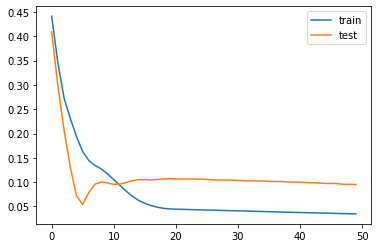

In [15]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()



In [16]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.687


(604, 16)
(484, 8) 484 (484,)
(484, 1, 8) (484,) (120, 1, 8) (120,)
Train on 484 samples, validate on 120 samples
Epoch 1/50
 - 1s - loss: 0.3810 - val_loss: 0.3110
Epoch 2/50
 - 0s - loss: 0.2942 - val_loss: 0.2114
Epoch 3/50
 - 0s - loss: 0.2415 - val_loss: 0.1310
Epoch 4/50
 - 0s - loss: 0.2051 - val_loss: 0.0663
Epoch 5/50
 - 0s - loss: 0.1769 - val_loss: 0.0350
Epoch 6/50
 - 0s - loss: 0.1617 - val_loss: 0.0504
Epoch 7/50
 - 0s - loss: 0.1517 - val_loss: 0.0764
Epoch 8/50
 - 0s - loss: 0.1432 - val_loss: 0.0893
Epoch 9/50
 - 0s - loss: 0.1349 - val_loss: 0.0902
Epoch 10/50
 - 0s - loss: 0.1256 - val_loss: 0.0845
Epoch 11/50
 - 0s - loss: 0.1155 - val_loss: 0.0787
Epoch 12/50
 - 0s - loss: 0.1052 - val_loss: 0.0758
Epoch 13/50
 - 0s - loss: 0.0948 - val_loss: 0.0763
Epoch 14/50
 - 0s - loss: 0.0845 - val_loss: 0.0785
Epoch 15/50
 - 0s - loss: 0.0751 - val_loss: 0.0814
Epoch 16/50
 - 0s - loss: 0.0671 - val_loss: 0.0841
Epoch 17/50
 - 0s - loss: 0.0609 - val_loss: 0.0866
Epoch 18/50

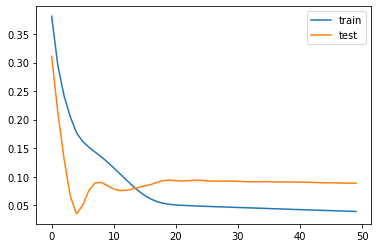

Test RMSE: 6.612


In [17]:
# load dataset
dataset = read_csv('../data/cleandata/DataMulti.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag days
n_days = 1
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)
 
# split into train and test sets
values = reframed.values
n_train_days = 484
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)